In [45]:
import xarray as xr
from dask.diagnostics import ProgressBar

In [46]:
with ProgressBar():
    df = xr.open_mfdataset(r'/nesi/project/niwa00018/rampaln/ML_downscaling_CCAM/GCM_emulator/ERA5_data/*.nc')

In [47]:
# loading the high-resolution data
with ProgressBar():
    df = df.load()

[########################################] | 100% Completed | 3.94 sms


In [50]:
for var in ['u', 'v', 't', 'q']:
    for lev in df.level.values:
        new_name = f"{var}_{int(lev)}"
        df[new_name] = df[var].sel(level=lev)

# Drop the original 4D variables
df = df.drop_vars(['u', 'v', 't', 'q', 'level'])#coarse_df

In [51]:
df

<xarray.Dataset>
Dimensions:    (longitude: 152, latitude: 134, time: 1917)
Coordinates:
  * longitude  (longitude) float32 150.5 150.8 151.0 151.2 ... 187.8 188.0 188.2
  * latitude   (latitude) float32 -59.5 -59.25 -59.0 ... -26.75 -26.5 -26.25
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2025-03-31
Data variables:
    u_850      (time, latitude, longitude) float64 7.407 7.196 ... 5.202 5.679
    u_500      (time, latitude, longitude) float64 12.21 12.21 ... 13.31 13.83
    v_850      (time, latitude, longitude) float64 -5.675 -5.526 ... 7.614 6.98
    v_500      (time, latitude, longitude) float64 -9.16 -9.273 ... 3.925 3.14
    t_850      (time, latitude, longitude) float64 268.4 268.4 ... 286.8 286.8
    t_500      (time, latitude, longitude) float64 245.5 245.5 ... 263.5 263.5
    q_850      (time, latitude, longitude) float64 0.002593 ... 0.006399
    q_500      (time, latitude, longitude) float64 0.0002272 ... 0.0005128
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-16 02:26:05 UTC+1100 by era5_replication_tools-1.7....
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 pressure-levels oper specific_humidity 20200101-20200131

In [53]:
df = df.rename({"latitude":"lat","longitude":"lon"})

In [60]:
df.to_netcdf('/nesi/project/niwa00018/rampaln/ML_downscaling_CCAM/GCM_emulator/ERA5_raw_v4.nc')

In [61]:
df = xr.open_dataset(r'/nesi/project/niwa00018/rampaln/ML_downscaling_CCAM/GCM_emulator/ERA5_remapped_con.nc')


In [66]:
df = df.rename({"lat":"latitude","lon":"longitude"})

In [67]:
df.to_netcdf('/nesi/project/niwa00018/rampaln/ML_downscaling_CCAM/GCM_emulator/ERA5_remapped_con_v2.nc')

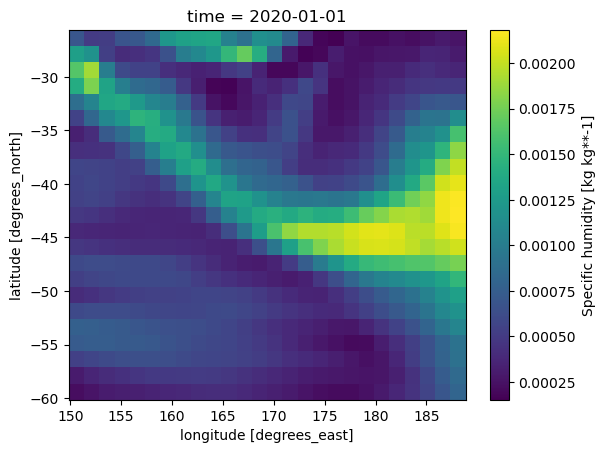

In [65]:
df.q_500.isel(time =0).plot()

In [59]:
df['lat'].attrs = {
    'standard_name': 'latitude',
    'units': 'degrees_north'
}
df['lon'].attrs = {
    'standard_name': 'longitude',
    'units': 'degrees_east'
}

In [41]:
target_grid = '/nesi/project/niwa00018/rampaln/ML_downscaling_CCAM/Downscaling-with-AI-reveals-large-role-of-internal-variability-in-fine-scale-projections-of-climate-extremes/GAN_inference_V2/CMIP6_download_and_preprocessing/Subset_CMIP6/target_grid.csv'

In [ ]:
f'cdo -L -sellevel,{vname} -remapcon,{target_grid} {file} {fname}'

In [39]:
import glob
import json
import os
import glob
import sys
from subprocess import call
from concurrent.futures import ProcessPoolExecutor, as_completed, wait
import pandas as pd
import numpy as np
import pathlib

In [26]:
coarse_df = df.coarsen(latitude = 6, longitude =6, boundary ='pad', side = 'right').mean()

In [27]:
with ProgressBar():
    coarse_df = coarse_df.load()

[########################################] | 100% Completed | 4.36 sms


In [28]:
for var in ['u', 'v', 't', 'q']:
    for lev in coarse_df.level.values:
        new_name = f"{var}_{int(lev)}"
        coarse_df[new_name] = coarse_df[var].sel(level=lev)

# Drop the original 4D variables
coarse_df = coarse_df.drop_vars(['u', 'v', 't', 'q', 'level'])#coarse_df

In [29]:
coarse_df.to_netcdf('/nesi/project/niwa00018/rampaln/ML_downscaling_CCAM/GCM_emulator/ERA5_test_rushed_version_v2_side_right.nc')

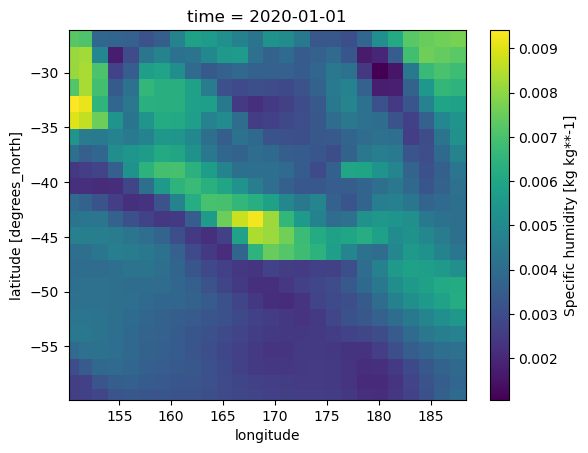

In [34]:
coarse_df.q_850.isel(time =0).plot()

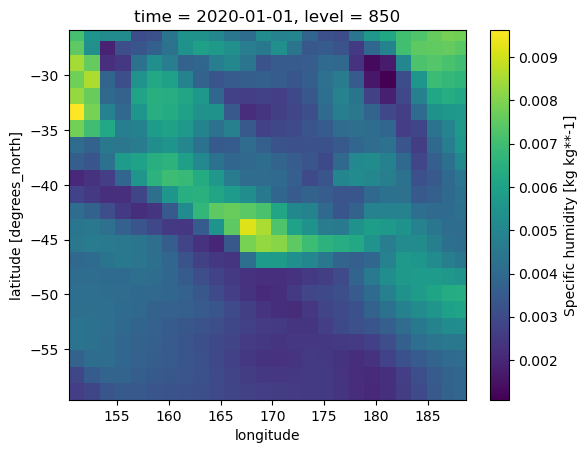

In [18]:
coarse_df.q.isel(time =0,level =0).plot()